# Fraud Detection (with highly imbalanced data)

(still a work in progress)

data:

https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud 

references: 

https://www.kaggle.com/code/joparga3/in-depth-skewed-data-classif-93-recall-acc-now 

https://www.kaggle.com/code/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets

#### 1. installation of relevant packages

In [ ]:
# %pip install numpy
# %pip install nltk
# %pip install seaborn
# %pip install scikit-learn
# %pip install wordcloud
# %pip install tensorflow

In [21]:
import math
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn import *

%matplotlib inline
import os

In [8]:
df = pd.read_csv("archive/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Columns/Features (labeled as V1,V2... ) have undergone PCA transformation

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Text(0, 0.5, 'Frequency')

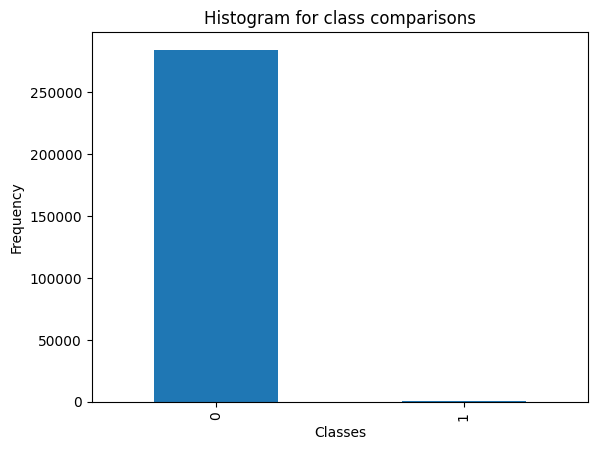

In [10]:
count_classes = df.Class.value_counts()
count_classes.plot(kind = 'bar')
plt.title("Histogram for class comparisons")
plt.xlabel("Classes")
plt.ylabel("Frequency")

In [11]:
print('No Fraud:',df['Class'].value_counts()[0],',', round(df['Class'].value_counts()[0]/len(df) * 100,2), '%')
print('Frauds',df['Class'].value_counts()[1],',', round(df['Class'].value_counts()[1]/len(df) * 100,2), '%')

No Fraud: 284315 , 99.83 %
Frauds 492 , 0.17 %


Data is very imbalanced/skewed, and this is a call for concern; the model will be using the majority class to assign label to all the transactions, but despite the high inaccuracy, it may potentially be misclassifying all the 1s.

In [23]:
# Normalising column 'Amount'
from sklearn.preprocessing import StandardScaler
toArr = df['Amount'].values
df['normAmount'] = StandardScaler().fit_transform(toArr.reshape(-1,1))
df = df.drop(['Time','Amount'],axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


### 3. Performing resampling
Purpose of performing resampling is so that we can obtain a ratio of 50:50 between both classes, removing the problems of class imbalance

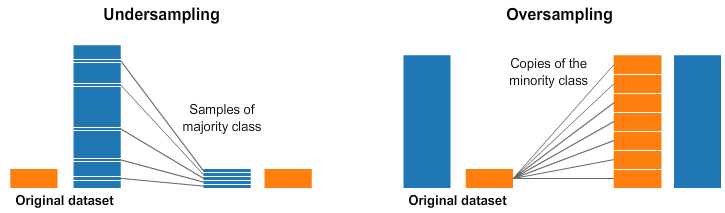

In [13]:
count_class_0, count_class_1 = df['Class'].value_counts()

# Separate into 2 dataframes
df_class_0 = df[df['Class'] == 0] # dataframe with no frauds
df_class_1 = df[df['Class'] == 1] # dataframe with frauds

0    492
1    492
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

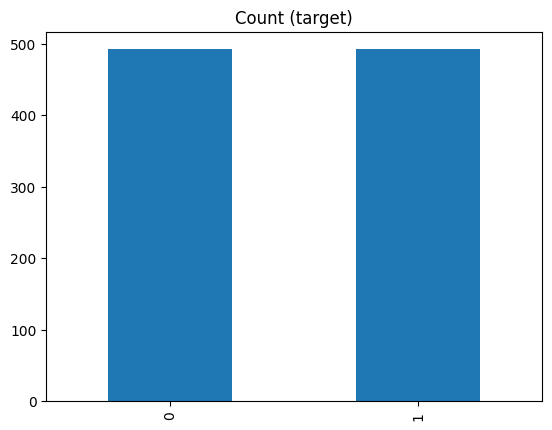

In [14]:
# Under sampling
df_class_0_under = df_class_0.sample(count_class_1) # sample 492 rows
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print(df_under['Class'].value_counts())

df_under['Class'].value_counts().plot(kind='bar', title='Count (target)')

0    284315
1    284315
Name: Class, dtype: int64


<AxesSubplot:title={'center':'Count (target)'}>

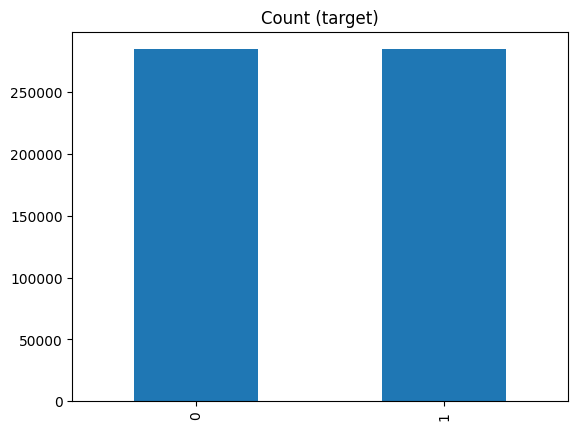

In [42]:
# Random over-sampling
df_class_1_over = df_class_1.sample(count_class_0, replace=True) 
# replace = true allows for the duplicate of a same row
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print(df_over['Class'].value_counts())

df_over['Class'].value_counts().plot(kind='bar', title='Count (target)')

Due to the lack of computational power, I will opt for the use of under-sampling first.

In [15]:
df_under = df_under.sample(frac = 1)
X_undersample = df_under.drop(['Class'],axis=1)
y_undersample = df_under['Class']

#### 4. Splitting of data into training and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample
                                                                                                   ,y_undersample
                                                                                                   ,test_size = 0.3
                                                                                                   ,random_state = 40)

print("Number of transactions in train dataset: ", len(X_train_undersample))
print("Number of transactions in test dataset: ", len(X_test_undersample))
print("Total number of transactions: ", len(X_train_undersample)+len(X_test_undersample))

Number of transactions in train dataset:  688
Number of transactions in test dataset:  296
Total number of transactions:  984


#### 5. Choosing suitable classifiers

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [36]:
classifiers = {
    "Logisitic Regression": LogisticRegression(max_iter=400),
    "KNearest Classifier": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

In [37]:
for key, classifier in classifiers.items():
    classifier.fit(X_train_undersample, y_train_undersample)
    training_score = cross_val_score(classifier, X_train_undersample, y_train_undersample, cv=5)
    print(key, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Logisitic Regression Has a training score of 93.0 % accuracy score
KNearest Classifier Has a training score of 65.0 % accuracy score
Support Vector Classifier Has a training score of 52.0 % accuracy score
Decision Tree Classifier Has a training score of 93.0 % accuracy score


Logistic regression gives the highest accuracy score, we will be using this classifier for training.

#### 6. Using grid search to tune the hyperparameters

In [ ]:
# Logistic Regression 
log_params = {"penalty": ['l1', 'l2'], 'C': np.logspace(-4,4,20), 'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}
grid_log_reg = GridSearchCV(LogisticRegression(max_iter = 400), log_params)
grid_log_reg.fit(X_train_undersample, y_train_undersample)


In [49]:
log_reg = grid_log_reg.best_estimator_
log_reg

LogisticRegression(C=0.03359818286283781, max_iter=400, solver='newton-cg')

In [50]:
predYtrain = log_reg.predict(X_train_undersample)
predYtest  = log_reg.predict(X_test_undersample)

# calculate accuracy
acc      = metrics.accuracy_score(y_train_undersample, predYtrain)
print("train accuracy =", acc)

# calculate accuracy
acc      = metrics.accuracy_score(y_test_undersample, predYtest)
print("test accuracy  =", acc)

train accuracy = 0.9593023255813954
test accuracy  = 0.9256756756756757
